In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
# Load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = (df['job_skills']
                    .apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else [])
                    )

In [6]:
df['job_title_short'].value_counts().head(5)

job_title_short
Data Analyst         196075
Data Engineer        186241
Data Scientist       172286
Business Analyst      49063
Software Engineer     44929
Name: count, dtype: int64

In [5]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

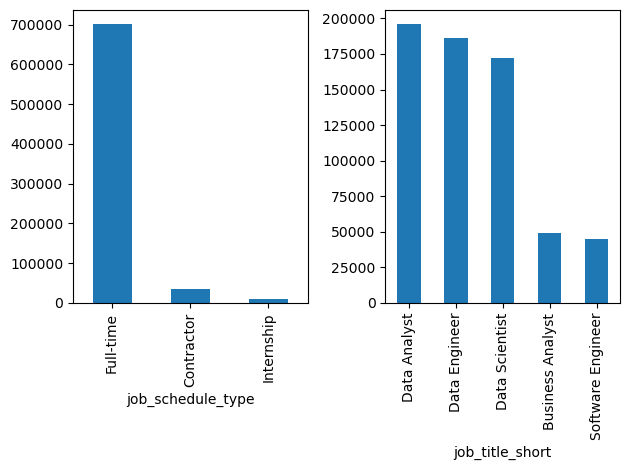

In [9]:
fig, ax = plt.subplots(1,2)

df['job_title_short'].value_counts().head(5).plot(kind='bar', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])

fig.tight_layout()

Example - Count of top skills in job postings

In [3]:
df_skills = df.copy()

In [4]:
df_skills = df_skills.explode('job_skills')

In [ ]:
skills_count = df_skills.groupby(['job_title_short', 'job_skills']).size()
df_skills_count= skills_count.reset_index(name = 'skill_count')
df_skills_count= df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


In [12]:
jobs = ['Data Scientist', 'Data Engineer', 'Data Analyst']

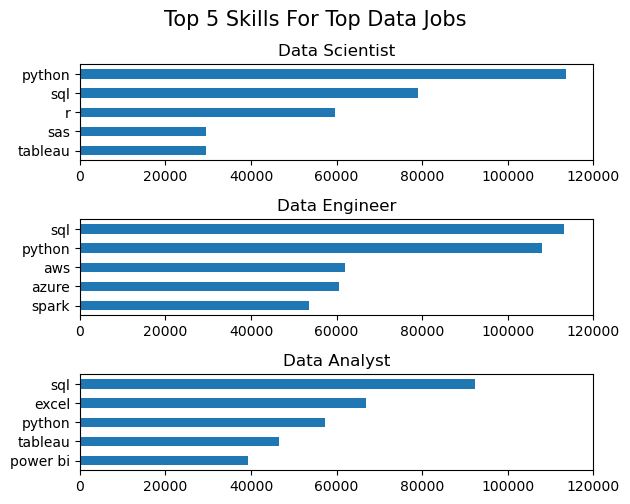

In [31]:
fig, ax = plt.subplots(3,1)

for i, job in enumerate(jobs):
    df_plot = df_skills_count[df_skills_count['job_title_short']== job].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title= job, legend=False, ylabel='')
    ax[i].invert_yaxis()
    ax[i].set_xlim(0,120000)
fig.tight_layout()
fig.suptitle('Top 5 Skills For Top Data Jobs', fontsize=15, y=1.04)
plt.show()